In [8]:
import pandas as pd

df = pd.read_csv('resources/co2_emmision_train_data.csv')
mask = df['CO2 Emissions (g/km)'] == 0
df = df[~mask]
df.drop_duplicates()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],...,Range 1 (km),Recharge Time (h),Fuel Type 2,Range 2 (km),Fuel Consumption [City (kWh/100 km)],Fuel Consumption [Comb (kWh/100 km)],Consumption [City (Le/100 km)],Consumption [Hwy (Le/100 km)],Consumption [Comb (Le/100 km)],Range (km)
0,2022.0,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.0,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.0,Acura,MDX Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022.0,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022.0,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,2022.0,Volvo,V60 T8 AWD Recharge Extended Range,Station wagon: Small,2.0,4.0,AS8,NaN,8.0,7.2,...,64.0,5.0,Z,792.0,NaN,NaN,NaN,NaN,NaN,NaN
26432,2022.0,Volvo,XC60 T8 AWD Recharge,SUV: Small,2.0,4.0,AS8,NaN,9.7,8.7,...,31.0,3.0,Z,769.0,NaN,NaN,NaN,NaN,NaN,NaN
26433,2022.0,Volvo,XC60 T8 AWD Recharge Extended Range,SUV: Small,2.0,4.0,AS8,NaN,8.5,8.5,...,58.0,5.0,Z,838.0,NaN,NaN,NaN,NaN,NaN,NaN
26434,2022.0,Volvo,XC90 T8 AWD Recharge,SUV: Standard,2.0,4.0,AS8,NaN,9.1,8.4,...,29.0,3.0,Z,813.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

def printDict(dictionary)->str:
    string = ''
    for k, v in dictionary.items():
        string += k.__str__() + '   ' + v.__str__() + '\n'
    return string
    

numdata = pd.DataFrame(df[['Year', 'Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]', 
                           'Fuel Consumption [Hwy (L/100 km)]', 'Fuel Consumption [Comb (L/100 km)]',
                           'CO2 Emissions (g/km)']])

label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
label_encoder_3 = LabelEncoder()

vehicle_class = df[['Vehicle Class']].values.ravel()
fuel_type = df[['Fuel Type']].values.ravel()
transmission = df[['Transmission']].values.ravel()

encoded_vehicle_class = label_encoder_1.fit_transform(vehicle_class)
encoded_fuel_type = label_encoder_2.fit_transform(fuel_type)
encoded_transmission = label_encoder_3.fit_transform(transmission)

enc_1 = dict(zip(label_encoder_1.classes_,range(len(label_encoder_1.classes_))))
enc_2 = dict(zip(label_encoder_2.classes_,range(len(label_encoder_2.classes_))))
enc_3 = dict(zip(label_encoder_3.classes_,range(len(label_encoder_3.classes_))))

print(printDict(enc_1))
print(printDict(enc_2))
print(printDict(enc_3))

C!O?MPACT   0
C%O?MPACT   1
C%OMPAC?T   2
C<OMPACT?   3
C<ompact%   4
C>OMPACT   5
C>OMPATC   6
C?OMPACT   7
CO!MPACT   8
CO!MPACT>   9
CO%MPACT   10
CO<MPACT   11
CO>M>P>ACT   12
CO>MPA%CT   13
CO>MPACT   14
CO?MP?ACT   15
CO?MPACT   16
COM!PACT   17
COM%PACT   18
COM<PACT   19
COM>PAC!T   20
COM>PACT   21
COM>PACT!   22
COM?PACT   23
COMP!ACT   24
COMP<A%CT   25
COMP<A>CT   26
COMP>A>CT   27
COMP?ACT!   28
COMPA%CT   29
COMPA?CT   30
COMPAC%T   31
COMPAC>T   32
COMPAC?T   33
COMPACT   34
COMPACT!   35
COMPACT%   36
COMPACT<   37
COMPACT>   38
COMPACT?   39
COMPATC   40
Co!mpact   41
Co%mpac>t?   42
Co<mpac!t   43
Co<mpact   44
Com?pa>ct   45
Comp?act   46
Compa!ct!   47
Compac>t   48
Compac?t   49
Compact   50
Compact>   51
Compatc   52
F<ULL-SIZE   53
F>ULL-SI<ZE   54
F?UL%L-SIZE   55
F?ULL-SIZE   56
FUL!L-SIZE   57
FULL%-SI>Z>E   58
FULL->S?IZE   59
FULL-?SI%ZE   60
FULL-S%IZE   61
FULL-S<IZE   62
FULL-S>I%Z%E   63
FULL-S>IZE!   64
FULL-SI<ZE!   65
FULL-SI?ZE   66
FULL-SIEZ   67
FU

In [10]:
X_ = numdata[['Year', 'Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]', 
                           'Fuel Consumption [Hwy (L/100 km)]', 'Fuel Consumption [Comb (L/100 km)]']]
#X_['Vehicle Class'] = encoded_vehicle_class
X_['Transmission'] = encoded_fuel_type
X_['Fuel Type'] = encoded_transmission
feature_names = X_.columns
X=X_.values

y = numdata[['CO2 Emissions (g/km)']].values.ravel()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def getMetrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'*****************')
    print(f'Метрики качества:')
    print(f'*****************')
    print(f'MAE: {mae:.10f}')
    print(f'MSE: {mse:.10f}')
    print(f'RMSE: {rmse:.10f}')
    print(f'R²: {r2:.10f}')
    
    # Визуализация предсказанных и фактических значений
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
    plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
    plt.xlabel('Наблюдение')
    plt.ylabel('Значение')
    plt.title('Фактические и предсказанные значения')
    plt.legend()
    plt.show()

    return (mae, mse, rmse, r2)


def getImportances(importances):
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
    plt.title('Важность признаков')
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.show()

def getRemains(y_test, y_pred):
    # 13. График остатков
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='orange')
    plt.title('Распределение остатков')
    plt.xlabel('Остаток (Target - Предсказание)')
    plt.ylabel('Частота')
    plt.show()
    
    # 14. Остатки vs Предсказанные значения
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title('Остатки vs Предсказанные значения')
    plt.show()

*****************
Метрики качества:
*****************
MAE: 0.3578910908
MSE: 3.5521752485
RMSE: 1.8847215308
R²: 0.9992169770


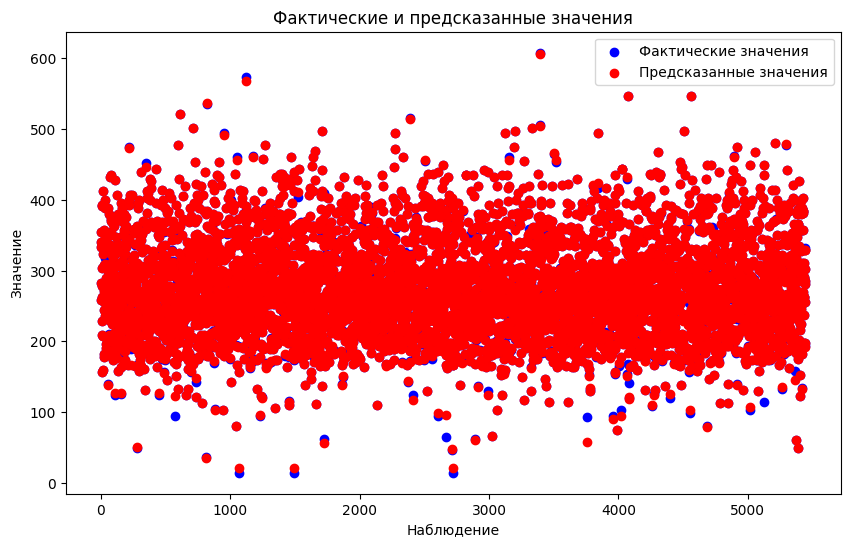

C:\Users\UserPc\AppData\Local\Temp\ipykernel_4312\1723501125.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


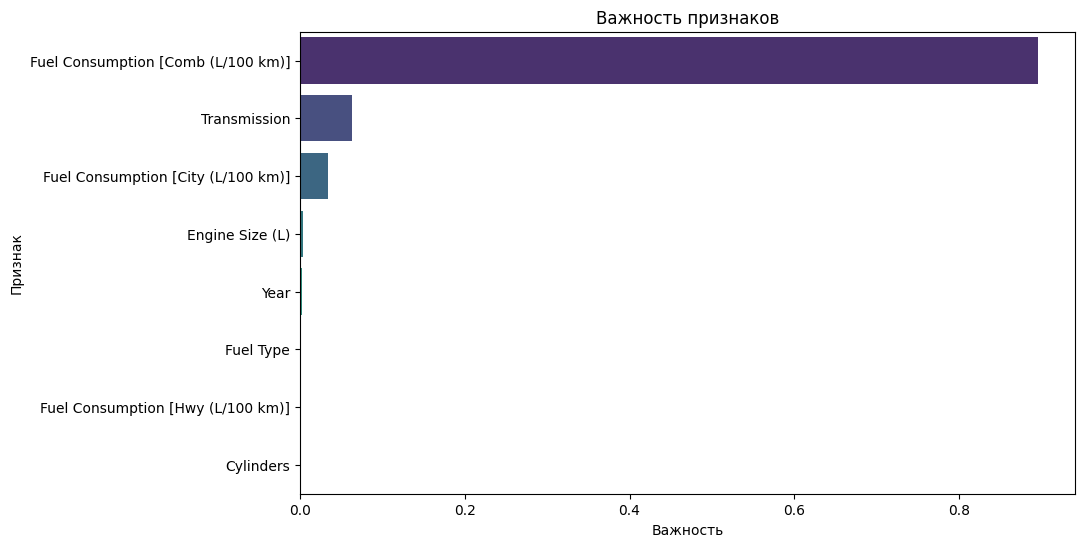

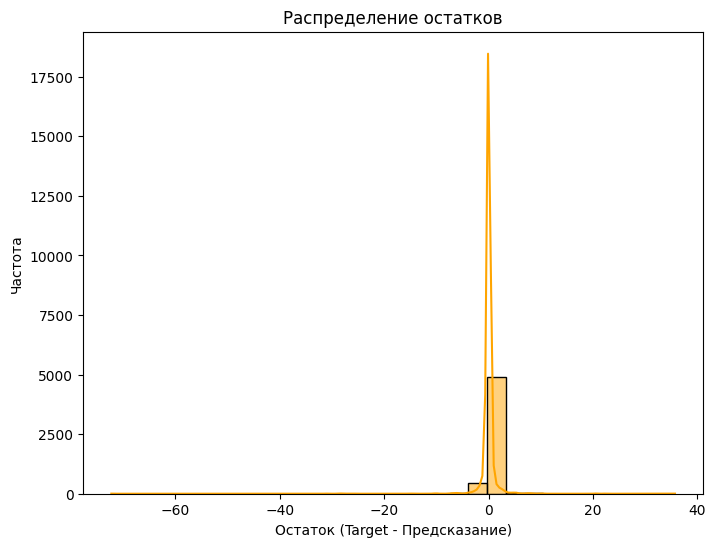

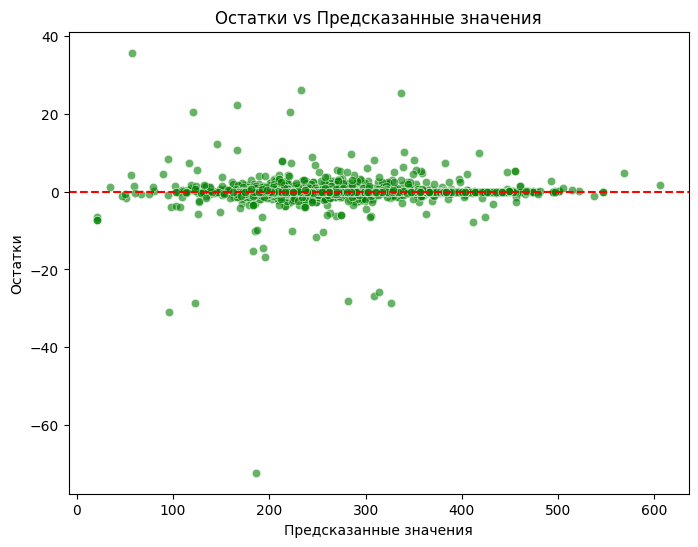

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting Regressor
rfr = RandomForestRegressor() # параметры
rfr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rfr.predict(X_test)

# Вычисление метрик
rfr_metrics = getMetrics(y_test, y_pred)

# Важность признаков
getImportances(rfr.feature_importances_)

getRemains(y_test, y_pred)


In [13]:
#дропаем не влияющие на результат колонки
X_ = X_.drop(columns=['Fuel Consumption [Hwy (L/100 km)]', 'Fuel Type', 'Cylinders'])
X=X_.values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\UserPc\Desktop\Новая папка\BHCourse_Homework_5\hw5_venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UserPc\Desktop\Новая папка\BHCourse_Homework_5\hw5_venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UserPc\Desktop\Новая папка\BHCourse_Homework_5\hw5_venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\UserPc\Desktop\Новая папка\BHCourse_Homework_5

Best parameters found: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
*****************
Метрики качества:
*****************
MAE: 0.4661917058
MSE: 3.8879887601
RMSE: 1.9717983568
R²: 0.9991429520


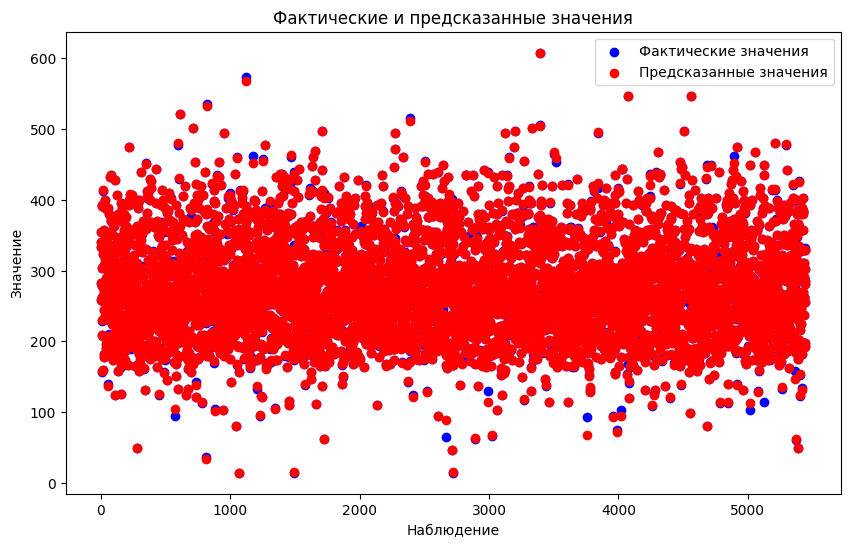

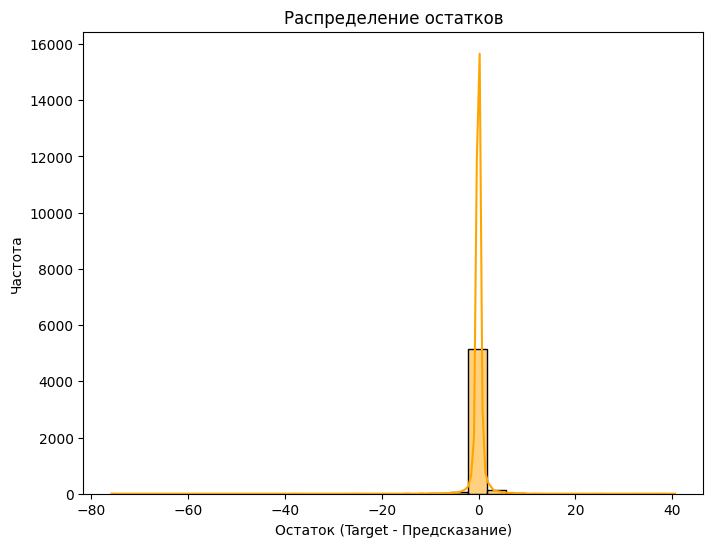

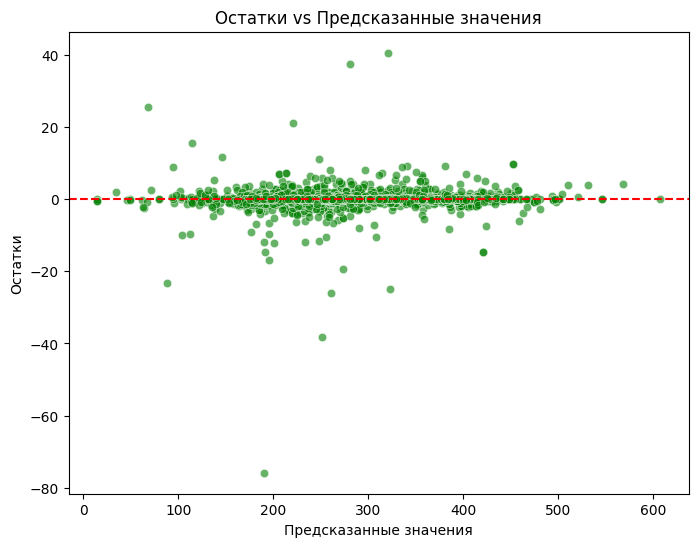

In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 8, 20],
    'max_features':[1, 'sqrt', 'log2'],
    'bootstrap':[True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

rfr_1 = RandomForestRegressor(**best_params) 
rfr_1.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = rfr_1.predict(X_test)

# Вычисление метрик
rfr_metrics = getMetrics(y_test, y_pred)

getRemains(y_test, y_pred)

In [15]:
#мой автомобиль (в реальности 149 - 191 г/км)
my_y = rfr.predict(((2004, 2.0, 0, 7.3, 4.5, 6.5, 0, 25),))
print(my_y) 

[137.89]


*****************
Метрики качества:
*****************
MAE: 2.0161405626
MSE: 12.1820039812
RMSE: 3.4902727660
R²: 0.9973146626


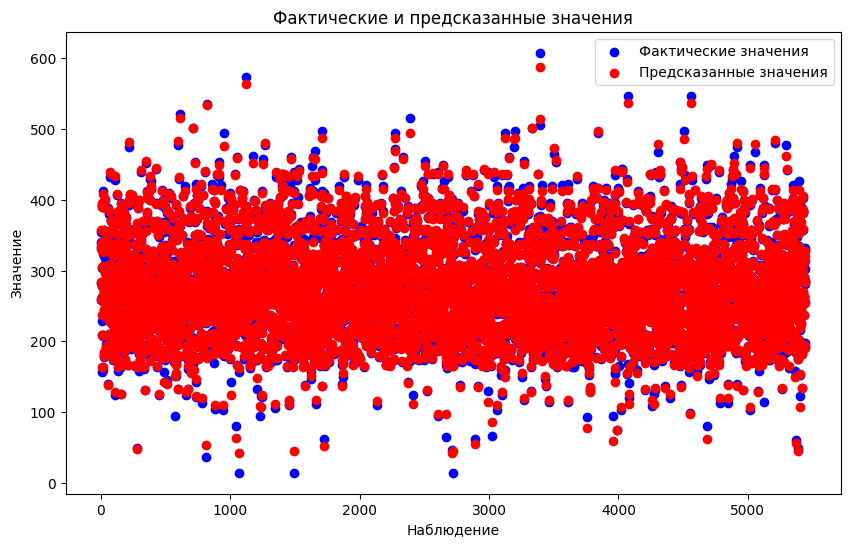

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor() # параметры
gbr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = gbr.predict(X_test)

# Вычисление метрик
gbr_metrics = getMetrics(y_test, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 21780, number of used features: 5
[LightGBM] [Info] Start training from score 274.856474
*****************
Метрики качества:
*****************
MAE: 0.9098351119
MSE: 8.2439888890
RMSE: 2.8712347325
R²: 0.9981827381


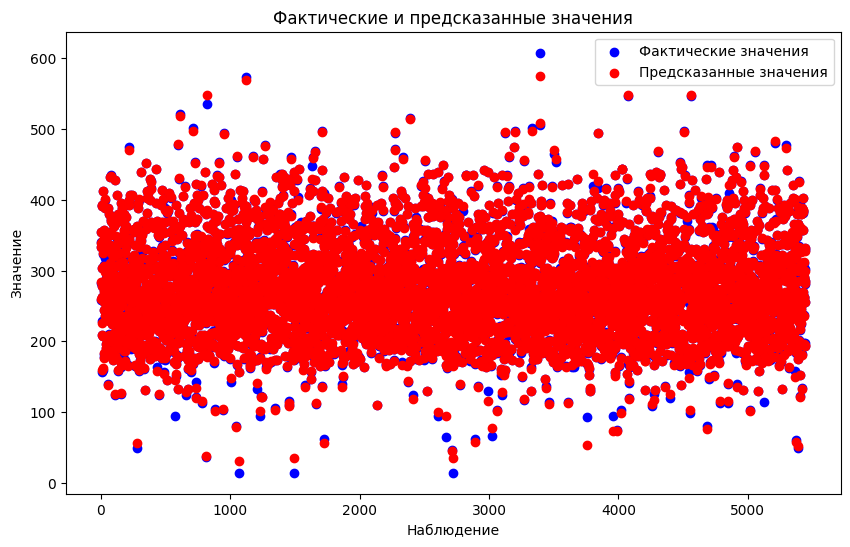

In [17]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor() # параметры
lgbm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lgbm.predict(X_test)

# Вычисление метрик
lgbm_metrics = getMetrics(y_test, y_pred)

*****************
Метрики качества:
*****************
MAE: 0.5848736346
MSE: 4.7803943960
RMSE: 2.1864113053
R²: 0.9989462348


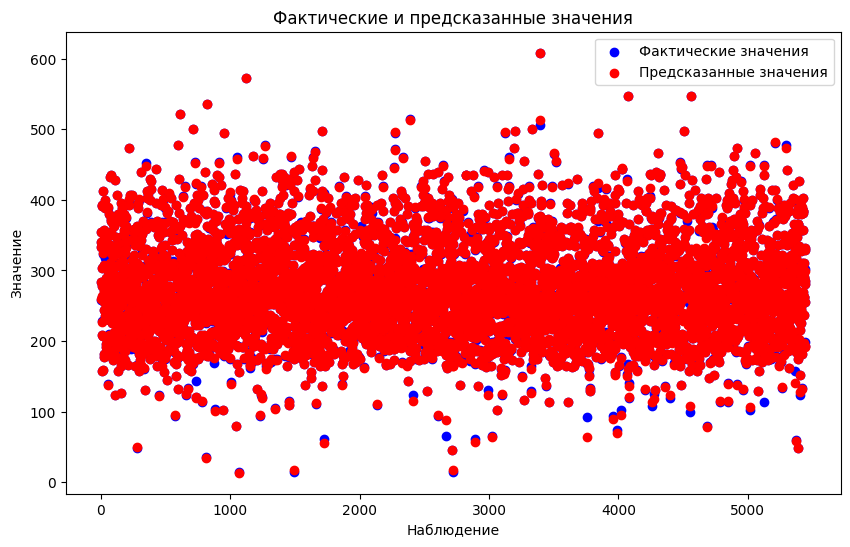

In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor() # параметры
xgb.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = xgb.predict(X_test)

# Вычисление метрик
lgbm_metrics = getMetrics(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

X = numdata[['Fuel Consumption [City (L/100 km)]']]
y = numdata[['CO2 Emissions (g/km)']].values.ravel() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'min_samples_split': [2, 8, 20],
    'max_features':[1, 'sqrt', 'log2'],
    'bootstrap':[True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

rfr_1 = RandomForestRegressor(**best_params) 
rfr_1.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = rfr_1.predict(X_test)

# Вычисление метрик
rfr_metrics = getMetrics(y_test, y_pred)

getRemains(y_test, y_pred)

In [ ]:
X = pd.DataFrame()
X['Transmission'] = encoded_fuel_type
X['Fuel Type'] = encoded_transmission

y = numdata[['CO2 Emissions (g/km)']].values.ravel()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'min_samples_split': [2, 8, 20],
    'max_features':[1, 'sqrt', 'log2'],
    'bootstrap':[True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Создание и обучение модели Gradient Boosting Regressor
rfr_1 = RandomForestRegressor(**best_params) # параметры
rfr_1.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rfr_1.predict(X_test)

# Вычисление метрик
rfr_metrics = getMetrics(y_test, y_pred)

getRemains(y_test, y_pred)